<a href="https://colab.research.google.com/github/MaadSaifuddin53/DeepLearningwithKeras/blob/master/IMDB_MODEL_8_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
pip install numpy==1.16.1

In [0]:
from keras.datasets import imdb

In [0]:
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

In [166]:
print(train_data.shape)
print(train_data.ndim)
print(len(train_data[0]))
print(len(train_data))
print(test_data.shape)
len(train_labels)

(25000,)
1
218
25000
(25000,)


25000

In [0]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [0]:
x_train = vectorize_sequences(train_data)
x_test =  vectorize_sequences(test_data)

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype("float32")

y_train

In [0]:
from keras import layers,models,optimizers,regularizers,initializers,losses

In [0]:
model = models.Sequential()
model.add(layers.Dense(32,activation="relu",input_shape=(10000,)))
model.add(layers.Dense(16,activation="relu",kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(8,activation="relu", kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(4,activation="relu", kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(2,activation="relu", kernel_initializer='glorot_uniform',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(1,activation="sigmoid"))

In [0]:
model.compile(optimizer=optimizers.rmsprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
x_val=x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train =y_train[10000:]

In [175]:
history=model.fit(partial_x_train,partial_y_train,epochs=10,batch_size=512,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 2s 156us/step - loss: 0.9430 - acc: 0.7124 - val_loss: 0.8473 - val_acc: 0.7639
Epoch 2/10
15000/15000 [==============================] - 2s 102us/step - loss: 0.7729 - acc: 0.8625 - val_loss: 0.7666 - val_acc: 0.8872
Epoch 3/10
15000/15000 [==============================] - 1s 98us/step - loss: 0.6864 - acc: 0.9074 - val_loss: 0.7391 - val_acc: 0.8310
Epoch 4/10
15000/15000 [==============================] - 1s 98us/step - loss: 0.6253 - acc: 0.9238 - val_loss: 0.6896 - val_acc: 0.8592
Epoch 5/10
15000/15000 [==============================] - 1s 100us/step - loss: 0.5719 - acc: 0.9407 - val_loss: 0.6446 - val_acc: 0.8785
Epoch 6/10
15000/15000 [==============================] - 1s 98us/step - loss: 0.5310 - acc: 0.9481 - val_loss: 0.6531 - val_acc: 0.8568
Epoch 7/10
15000/15000 [==============================] - 1s 99us/step - loss: 0.4960 - acc: 0.9554 - val_loss: 0.6554 - val_

In [176]:
history_dict = history.history
history_dict.keys()
print("Train_Loss",np.sum(history_dict['loss']))
print("Validating_Loss",np.sum(history_dict['val_loss']))
print("Trianing_accuracy",np.sum(history_dict['acc']))
print("Validation_accuracy",np.sum(history_dict['val_acc']))

Train_Loss 5.948714633607864
Validating_Loss 6.802726237201691
Trianing_accuracy 9.150599999459583
Validation_accuracy 8.525299999332427


In [0]:
import matplotlib.pyplot as plt

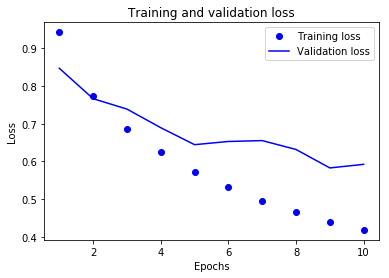

In [178]:
history_dict = history.history
loss=history_dict['loss']
val_loss = history_dict['val_loss']
acc=history_dict['acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs,loss, 'bo', label='Training loss')
plt.plot(epochs,val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

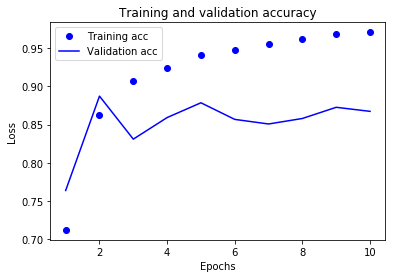

In [179]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs,acc_values, 'bo', label='Training acc')
plt.plot(epochs,val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [180]:
test_loss,test_acc = model.evaluate(x_test,y_test)

25000/25000 [==============================] - 2s 98us/step


In [181]:
print("test_acc",test_acc*100)
print("test_loss",test_loss*100)

test_acc 85.424
test_loss 61.32454130363464


In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')